# Collecting data and getting started with Linear Regression

Importing some important libraries like numpy, pandas, matplotlib,etc..


In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Problem solving

We have cars dataset which includes all the type of cars with their features. A  Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

# GOAL OF OUR PREDICTION


Goal is to build a model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels.

Uploading the dataset  

In [114]:
# from google.colab import files       #for google colab

car=pd.read_csv('CarPrice_Assignment.csv') #for jupyter notebook

# uploaded = files.upload()

# import io
# car = pd.read_csv(io.StringIO(uploaded['CarPrice_Assignment.csv'].decode('utf-8')))
# print(car.head())


car.info()                    #display information about dataset

car.describe()                #this describes all the basic statistics that summarize the central tendency,dispersion and shape of a dataset’s distribution



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [115]:
car.head()                    #displaying the dataset top five entries

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [116]:
car.dtypes                    #datatype of all the columns

car_ID                int64
symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object


# EDA 

In [117]:
car.isnull().sum()              # we can see that there is no null values

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [118]:
print('fueltype')                             
car.fueltype.nunique() 
#Now analysing the categorical data like fueltype is of two type hence we will default the 
#Changing the values of fueltype. Gas type to 1 and diesel type to 2.
f=car.fueltype
car.fueltype[car.fueltype=='gas']=1
car.fueltype[car.fueltype=='diesel']=2


fueltype


F:\anaconda\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\anaconda\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [119]:
f=car.aspiration                            #set value for std aspiration as 1 and other as 2
car.aspiration[car.aspiration=='std']=1
car.aspiration[car.aspiration=='turbo']=2


F:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [120]:
f=car.doornumber                     #Changing the doornumbers to numeric form
car.doornumber[car.doornumber=='two']=2
car.doornumber[car.doornumber=='four']=4


car.enginelocation        

f=car.enginelocation                     #Engine location to front as 1 and back as 2
car.enginelocation[car.enginelocation=='front']=1
car.enginelocation[car.enginelocation=='rear']=2


f=car.cylindernumber                  #changing string to numeric form
car.cylindernumber[car.cylindernumber=='one']=1
car.cylindernumber[car.cylindernumber=='two']=2
car.cylindernumber[car.cylindernumber=='three']=3
car.cylindernumber[car.cylindernumber=='four']=4
car.cylindernumber[car.cylindernumber=='five']=5
car.cylindernumber[car.cylindernumber=='six']=6
car.cylindernumber[car.cylindernumber=='seven']=7
car.cylindernumber[car.cylindernumber=='eight']=8
car.cylindernumber[car.cylindernumber=='twelve']=12


car.columns.unique() #checking all the columns in the dataset                  

F:\anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
F:\anaconda\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
F:\anaconda\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
F:\anaconda\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning:

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')


### Convert categorical variable into dummy/indicator variables.
### Dummies 
##### Turn a categorical variable into a series of zeros and ones, which makes them a lot easier to quantify and compare.

In [121]:
dummy1=pd.get_dummies(car['carbody']) #turns carbody column into a dummy variable 
dummy1.tail()

dummy2=pd.get_dummies(car['drivewheel']) #turns drivewheel column into a dummy variable 
dummy2.head()

dummy3=pd.get_dummies(car['enginetype']) #turns enginetype column into a dummy variable 
dummy3.tail()

dummy4=pd.get_dummies(car['fuelsystem'])  #turns fuelsystem column into a dummy variable 
dummy4.tail()

car=pd.concat([car,dummy1,dummy2,dummy3,dummy4],axis=1) #merging all the values to dataset 
car.head()



,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,1,3,alfa-romero giulia,1,1,2,convertible,rwd,1,88.6,...,0,0,0,0,0,0,0,1,0,0
1,2,3,alfa-romero stelvio,1,1,2,convertible,rwd,1,88.6,...,0,0,0,0,0,0,0,1,0,0
2,3,1,alfa-romero Quadrifoglio,1,1,2,hatchback,rwd,1,94.5,...,1,0,0,0,0,0,0,1,0,0
3,4,2,audi 100 ls,1,1,4,sedan,fwd,1,99.8,...,0,0,0,0,0,0,0,1,0,0
4,5,2,audi 100ls,1,1,4,sedan,4wd,1,99.4,...,0,0,0,0,0,0,0,1,0,0


In [122]:
# car[['Car','Model']] = car.CarName.str.split(" ",expand=True,)
# car

car['Company']=car.CarName.str.split(" ").str[0].tolist()
car.head()


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi,Company
0,1,3,alfa-romero giulia,1,1,2,convertible,rwd,1,88.6,...,0,0,0,0,0,0,1,0,0,alfa-romero
1,2,3,alfa-romero stelvio,1,1,2,convertible,rwd,1,88.6,...,0,0,0,0,0,0,1,0,0,alfa-romero
2,3,1,alfa-romero Quadrifoglio,1,1,2,hatchback,rwd,1,94.5,...,0,0,0,0,0,0,1,0,0,alfa-romero
3,4,2,audi 100 ls,1,1,4,sedan,fwd,1,99.8,...,0,0,0,0,0,0,1,0,0,audi
4,5,2,audi 100ls,1,1,4,sedan,4wd,1,99.4,...,0,0,0,0,0,0,1,0,0,audi


In [123]:
car.drop(['CarName'], axis = 1,inplace=True) 

In [124]:
car.drop(['car_ID','carbody','drivewheel','enginetype','fuelsystem'], axis = 1,inplace=True) 

car.head()

# car.CarName.nunique()

car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null object
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
convertible         205 non-null uint8
hardtop             205 non-null uint8
hatchback       

# Data Analysis

Let us now find the company wise effect on pricing of a car. 

F:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


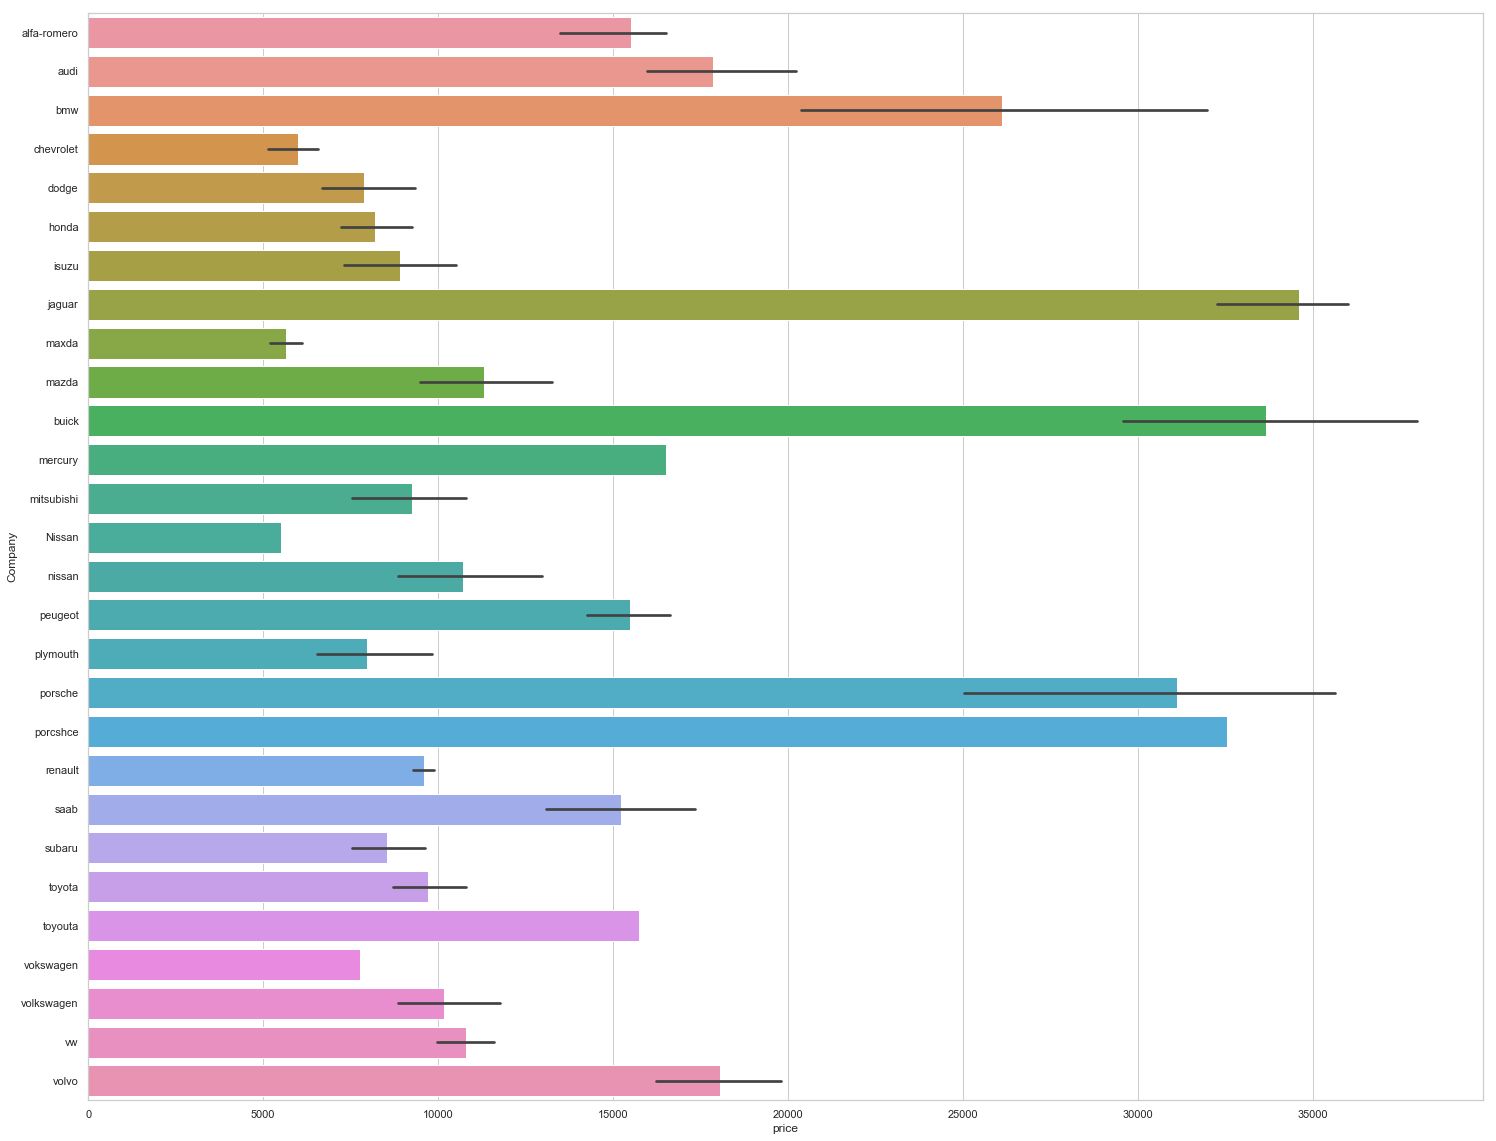

In [125]:
plt.figure (figsize=(25,20)) #display the price of cars according to company name
sns.barplot(y='Company',x='price',data=car)

<Figure size 1800x1440 with 0 Axes>

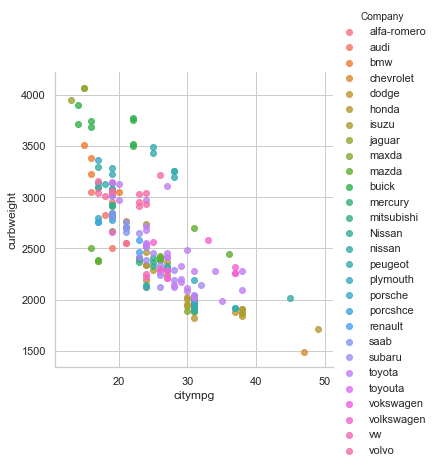

In [126]:
plt.figure (figsize=(25,20))#analysing according to the citympg and curbweight of cars
g = sns.lmplot('citympg',"curbweight", car, hue="Company", fit_reg=False);

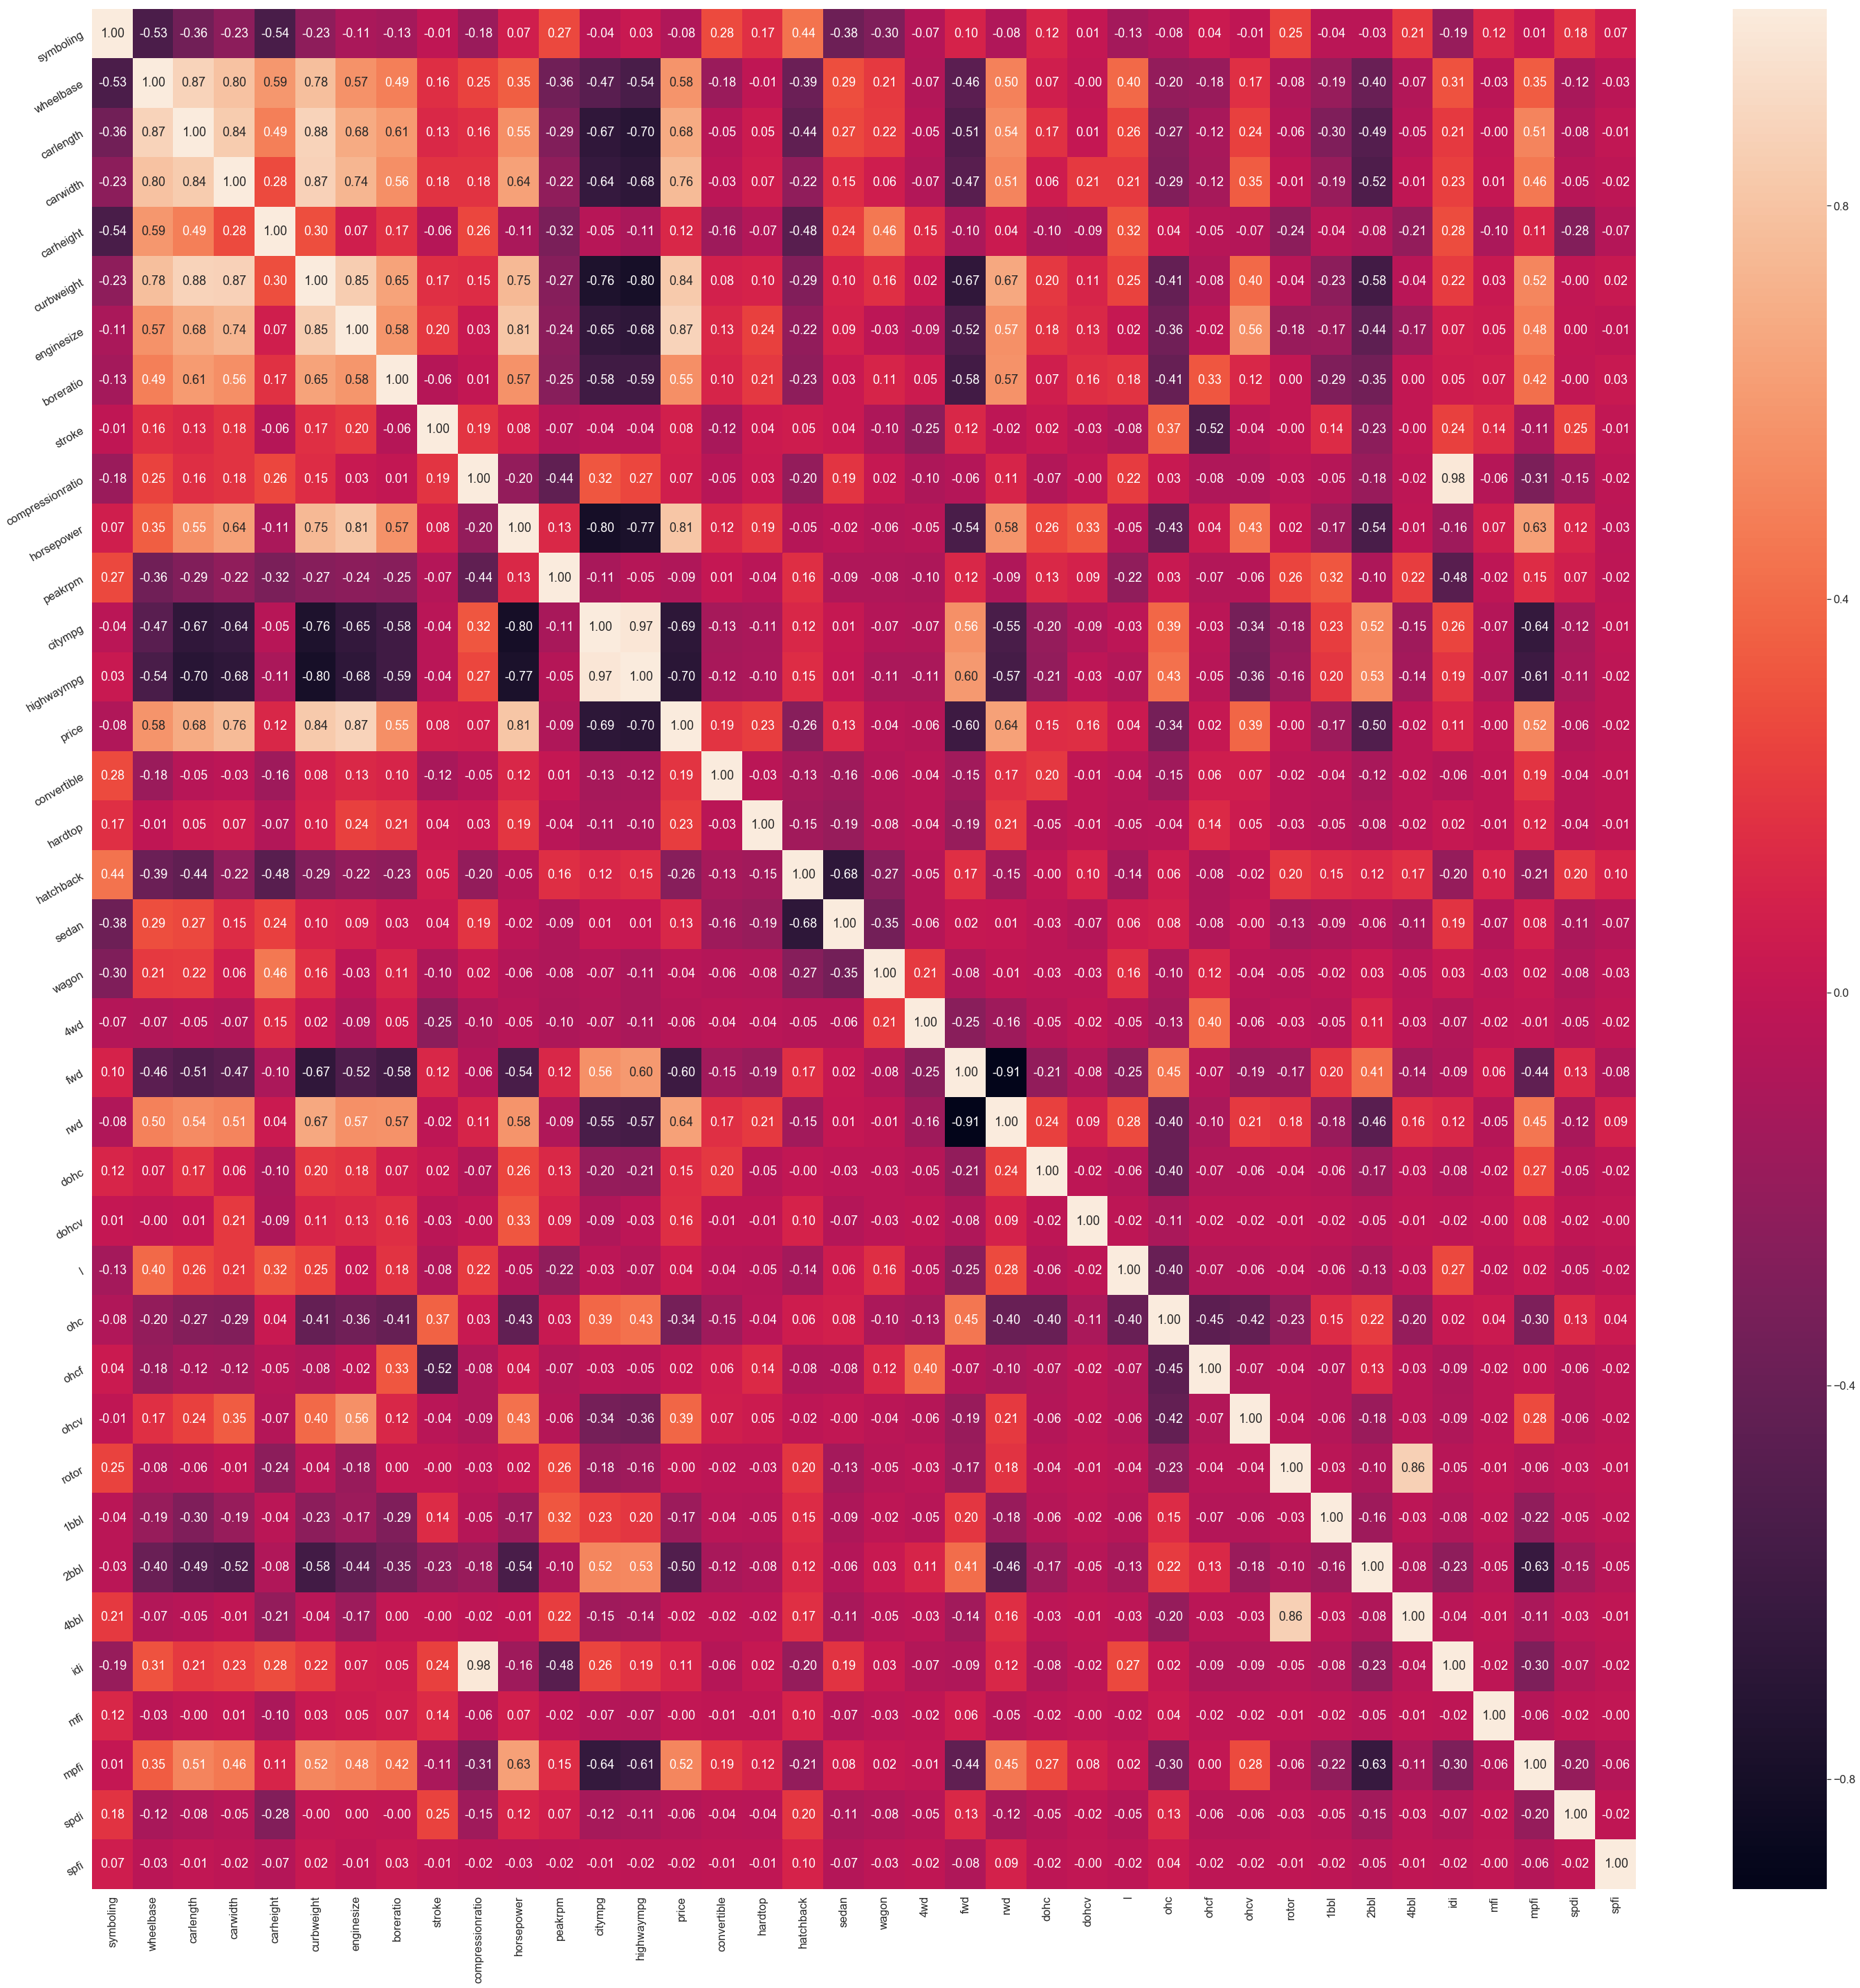

In [127]:
import seaborn as sns               
corr = car.corr()      
#Corelation matrix:this will show the relationship between every variable of your matrix. 
plt.figure (figsize=(50,50))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 3.5})

a = sns.heatmap(corr, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

# LINEAR REGRESSION MODEL 

Linear Regression
Goal is to fit a best line. The best fit line is the one for which total prediction error (all data points) are as small as possible. Error is the distance between the point to the regression line. 

Linear Regression is a statistical technique which is used to find the linear relationship between dependent and one or more independent variables. This technique is applicable for Supervised Learning Regression problems where we try to predict a continuous variable. 

Linear Regression can be further classified into two types – Simple and Multiple Linear Regression. In this project, I employ Simple Linear Regression technique where I have one independent and one dependent variable. It is the simplest form of Linear Regression where we fit a straight line to the data.

In [128]:
car1=car.copy()           #create another dataframe with same columns as car
car1.info()   
car1.drop(['Company'], axis = 1,inplace=True) #Drop the string value column 
array=car1.values
car1.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 44 columns):
symboling           205 non-null int64
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
cylindernumber      205 non-null object
enginesize          205 non-null int64
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm             205 non-null int64
citympg             205 non-null int64
highwaympg          205 non-null int64
price               205 non-null float64
convertible         205 non-null uint8
hardtop             205 non-null uint8
hatchback       

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,1,2,1,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,1,2,1,94.5,171.2,65.5,52.4,2823,...,1,0,0,0,0,0,0,1,0,0
3,2,1,1,4,1,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,1,4,1,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [129]:
car1no=(car1-car1.mean())/(car1.max()-car1.min())   #normalisation formula
car1no=car1no.apply(pd.to_numeric, errors='coerce')
car1no.head()

,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,ohcv,rotor,1bbl,2bbl,4bbl,idi,mfi,mpfi,spdi,spfi
0,0.433171,-0.097561,-0.180488,-0.560976,-0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.063415,-0.019512,-0.053659,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878
1,0.433171,-0.097561,-0.180488,-0.560976,-0.014634,-0.296110,-0.078347,-0.150650,-0.410407,-0.002935,...,-0.063415,-0.019512,-0.053659,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878
2,0.033171,-0.097561,-0.180488,-0.560976,-0.014634,-0.124099,-0.042526,-0.033984,-0.110407,0.103737,...,0.936585,-0.019512,-0.053659,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878
3,0.233171,-0.097561,-0.180488,0.439024,-0.014634,0.030420,0.038071,0.024350,0.047927,-0.084781,...,-0.063415,-0.019512,-0.053659,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878
4,0.233171,-0.097561,-0.180488,0.439024,-0.014634,0.018758,0.038071,0.041016,0.047927,0.104125,...,-0.063415,-0.019512,-0.053659,-0.321951,-0.014634,-0.097561,-0.004878,0.541463,-0.043902,-0.004878


In [130]:
car1no.dtypes

symboling           float64
fueltype            float64
aspiration          float64
doornumber          float64
enginelocation      float64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight          float64
cylindernumber      float64
enginesize          float64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower          float64
peakrpm             float64
citympg             float64
highwaympg          float64
price               float64
convertible         float64
hardtop             float64
hatchback           float64
sedan               float64
wagon               float64
4wd                 float64
fwd                 float64
rwd                 float64
dohc                float64
dohcv               float64
l                   float64
ohc                 float64
ohcf                float64
ohcv                float64
rotor               float64
1bbl                

# Train test split

In [131]:
x=car1no.iloc[:,car1no.columns!='price']    #taking all the columns except price column(output)
y=car1no['price']                           

In [132]:
from sklearn.model_selection import train_test_split   #train test split te data 
train_x,test_x,train_y, test_y = train_test_split(x,y, test_size=0.25)

In [133]:
train_y.shape

(153,)

In [134]:
test_y.shape

(52,)

In [135]:
train_x.shape

(153, 42)

In [136]:
test_x.shape

(52, 42)

In [137]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn import linear_model as lm
model1 =lm.LinearRegression()
model1.fit(train_x, train_y)  # perform linear fit/regression
slope = (np.squeeze(model1.coef_)).sum()
intercept = model1.intercept_

def predict_metrics(lr, x, y):
    pred = lr.predict(x)
    mae = mean_absolute_error(y, pred)
    mse = mean_squared_error(y, pred)
    r2 = r2_score(y, pred)
    return mae, mse, r2
training_mae, training_mse, training_r2 = predict_metrics(model1, train_x, train_y)


print('slope:', slope, '    intercept:', intercept)      #calculates the slope and intercept
test_mae, test_mse, test_r2 = predict_metrics(model1, train_x, train_y)

print('Training mean error: ', training_mae, 'training mse: ', training_mse, 'training r2: ', training_r2)
print(model1.score(test_x,test_y))  # calculates the training mean error,trining mse and training r2,


slope: 1.2591039975030103     intercept: -0.00540874853600397
Training mean error:  0.030082315748217615 training mse:  0.001526110735064515 training r2:  0.9525044793458184
0.8200227969879487


### RFE
The Recursive Feature Elimination (or RFE) works by recursively removing attributes and building a model on those attributes that remain.

It uses the model accuracy to identify which attributes (and combination of attributes) contribute the most to predicting the target attribute.

In [138]:
import statsmodels.api as sm
import statsmodels.formula.api as smf


In [139]:
model=lm.LinearRegression()

Rfe model

In [140]:
from sklearn.feature_selection import RFE
rfe1 = RFE(model, 22)          #taking half of the features here from 1-22 
rfe1 = rfe1.fit(x,y)            
                               
print(rfe1.support_)    #it will separate the selected and non selected values according to rfe by true or false
print(rfe1.ranking_)

[False  True  True False  True False False  True  True  True  True  True
  True  True  True False  True False  True  True False False False False
 False False  True  True False  True False False  True  True False False
 False  True  True False  True False]
[ 5  1  1 15  1  4  6  1  1  1  1  1  1  1  1 18  1 14  1  1 10  8 21  3
 11 12  1  1  7  1  9 17  1  1 13 19  2  1  1 20  1 16]


In [141]:
features =x.columns[rfe1.support_] 

In [142]:
#working on summary of rfe
X_train_rfe = train_x[features]
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(train_y,X_train_rfe).fit() 
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.942
Model:                            OLS   Adj. R-squared:                  0.933
Method:                 Least Squares   F-statistic:                     102.1
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           1.18e-70
Time:                        00:06:32   Log-Likelihood:                 264.28
No. Observations:                 153   AIC:                            -484.6
Df Residuals:                     131   BIC:                            -417.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.0045      0.004  

We will see the more the p-value variable the less significant they are so remove them
first see the VIF and p-value and remove then according to p-value remove them from model.

## VIF 
The Variance Inflation Factor (VIF) is a measure of colinearity among predictor variables within a multiple regression.

In [143]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 

In [144]:
vif1 = pd.DataFrame()
vif1["vif"] = [variance_inflation_factor(X_train_rfe.values, a) for a in range(X_train_rfe.shape[1])]
vif1["features"] = X_train_rfe.columns # calculated vif on the rfe result features


F:\anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:181: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


In [145]:
vif1.round(1)

,vif,features
0,1.000000,const
1,inf,fueltype
2,3.100000,aspiration
3,1.800000,enginelocation
4,5.200000,carwidth
5,2.200000,carheight
6,18.900000,curbweight
7,8.500000,cylindernumber
8,21.300000,enginesize
9,3.500000,boreratio


The results show that multi-collinearity is indeed a serious problem. The regression model of INDEX 1,20 against the other variables even give a nearly perfect fit (R2 = 1) which results in an undefined VIF (denoted by inf in the table with results).
But VIF values are very high for compressionratio as well, indicating that these variables can be linearly predicted with a high level of accuracy.

In [146]:
vif2=vif1.drop(vif1.index[[1,8,11,20]]) #removing the features which is having inf and highest vif

In [147]:
vif2.round(1)

,vif,features
0,1.0,const
2,3.1,aspiration
3,1.8,enginelocation
4,5.2,carwidth
5,2.2,carheight
6,18.9,curbweight
7,8.5,cylindernumber
9,3.5,boreratio
10,2.0,stroke
12,2.2,peakrpm


In [148]:
car11=car1no[['aspiration','price','enginelocation','carwidth','curbweight','cylindernumber','carheight','boreratio','stroke','peakrpm','highwaympg','convertible','rwd','dohc', 'l','ohcv','rotor','mfi','spdi']]

### FIRST MODEL 
Which takes the input of those features which are significant thus having low VIF value

In [149]:
model_01=car11[['aspiration','price','enginelocation','carwidth','curbweight','cylindernumber','carheight','boreratio','stroke','peakrpm','highwaympg','convertible','rwd','dohc', 'l','ohcv','rotor','mfi','spdi']]

In [150]:
a= model_01.loc[:,model_01.columns !='price'] #separting the dataset into two parts
b= model_01['price']                        

In [151]:
from sklearn.model_selection import train_test_split 
train_a,test_a,train_b,test_b=train_test_split(a,b,test_size=0.25)
#split dataset into train test spilt 


In [152]:
# object for model
from sklearn.linear_model import LinearRegression
model_01=LinearRegression()

In [153]:
model_01.fit(train_a,train_b) #model fit

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [154]:
print('intercept:' ,model_01.intercept_) #intercept

intercept: 0.0022386628063265582


In [155]:
train_a_sm = train_a
train_a_sm = sm.add_constant(train_a_sm) 
#ADDING CONSTANTS 
la = sm.OLS(train_b,train_a_sm).fit()


In [156]:
print(la.summary())   #getting summary of the model 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     61.52
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           1.15e-55
Time:                        00:06:36   Log-Likelihood:                 197.27
No. Observations:                 153   AIC:                            -356.5
Df Residuals:                     134   BIC:                            -299.0
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0022      0.006      0.

In [157]:
vif01 = pd.DataFrame()
vif01["vif"] = [variance_inflation_factor(train_a_sm.values, a) for a in range(train_a_sm.shape[1])]
vif01["features"] =train_a_sm.columns # calculated vif on the rfe result features

In [158]:
vif01

,vif,features
0,1.028335,const
1,1.811529,aspiration
2,1.651462,enginelocation
3,5.181944,carwidth
4,16.801232,curbweight
5,5.853844,cylindernumber
6,2.162087,carheight
7,2.803031,boreratio
8,1.382139,stroke
9,1.805557,peakrpm


#### First check both the p-value and vif of the features, should be less and if both features have high values then eleminate that variable ,otherwise check on the bases of p-value and remove variables, which are not significant for the model.



### Second Model


In [159]:
model_02=car11[['price','enginelocation','curbweight','peakrpm','convertible','cylindernumber','rwd','dohc','ohcv','rotor','l']]

In [160]:
j= model_02.loc[:,model_02.columns !='price'] #taking values except price column 
k= model_02['price']

In [161]:
train_j,test_j,train_k,test_k=train_test_split(j,k,test_size=0.25) #Train test and split the data with 25% test and 75% train data 

In [162]:
from sklearn.linear_model import LinearRegression
model_02=LinearRegression()     #Train another linear regression model with the improved features

In [163]:
model_02.fit(train_j,train_k)  #fit data

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [164]:
print('intercept:',model_02.intercept_)  #calculating intercept of the model


intercept: -0.0051534184187263165


In [165]:
r_pred =model_02.predict(test_j) #model prediction 

In [166]:
train_j_sm = train_j        #create ols model to get the summary of the model 
train_j_sm = sm.add_constant(train_j_sm)
lb = sm.OLS(train_k,train_j_sm).fit()
lb.params

const            -0.005153
enginelocation    0.305865
curbweight        0.610775
peakrpm           0.065968
convertible       0.063338
cylindernumber    0.691734
rwd               0.044502
dohc             -0.070528
ohcv             -0.096423
rotor             0.132064
l                -0.092805
dtype: float64

In [167]:
print(lb.summary()) #summary of the model

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.859
Method:                 Least Squares   F-statistic:                     93.42
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           2.45e-57
Time:                        00:06:38   Log-Likelihood:                 189.99
No. Observations:                 153   AIC:                            -358.0
Df Residuals:                     142   BIC:                            -324.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0052      0.006     -0.

In [168]:
mse = mean_squared_error(test_k, r_pred)   #getting the mean square error and r2 score 
r_sq = r2_score(test_k, r_pred)

In [169]:
mse          

0.006512467193152752

In [170]:
r_sq #r-squared value

0.8563430104887328

In [171]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(test_k, r_pred)))  #root mean sq value

RMSE : 0.08069985869351168


#### Now the features are mostly significant only few are having p-value more than 0.05 hence removing those features in next model

In [172]:
vif02 = pd.DataFrame()
vif02["vif"] = [variance_inflation_factor(train_j_sm.values, a) for a in range(train_j_sm.shape[1])]
vif02["features"] = train_j_sm.columns # calculated vif on the rfe result features
vif02

,vif,features
0,1.029832,const
1,1.357617,enginelocation
2,3.169897,curbweight
3,1.305208,peakrpm
4,1.310566,convertible
5,3.543016,cylindernumber
6,2.154259,rwd
7,1.287168,dohc
8,2.318642,ohcv
9,1.423501,rotor


As we have VIF less for all factors we'll now look by checking p-value and then remove them accordingly 

### Third  Model

In [173]:
model_03=car11[['price','enginelocation','curbweight','peakrpm','convertible','cylindernumber','rwd','dohc','ohcv','rotor']]

In [174]:
u= model_03.loc[:,model_03.columns !='price']
v= model_03['price']

In [175]:
train_u,test_u,train_v,test_v=train_test_split(u,v,test_size=0.25)

In [176]:
from sklearn.linear_model import LinearRegression
model_03=LinearRegression()

In [177]:
model_03.fit(train_u,train_v)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [178]:
print('intercept:',model_03.intercept_)

intercept: 0.004999043444429391


In [179]:
v_pred =model_03.predict(test_u) #model prediction 

In [180]:
train_u_sm = train_u
train_u_sm = sm.add_constant(train_u_sm) #add constant to obtain summary of same 
lu= sm.OLS(train_v,train_u_sm).fit()
lu.params

const             0.004999
enginelocation    0.273518
curbweight        0.596724
peakrpm           0.064436
convertible       0.089071
cylindernumber    0.758461
rwd               0.040621
dohc             -0.040273
ohcv             -0.153867
rotor             0.136292
dtype: float64

In [181]:
vif02 = pd.DataFrame()
vif02["vif"] = [variance_inflation_factor(train_j_sm.values, a) for a in range(train_j_sm.shape[1])]
vif02["features"] =train_j_sm.columns # calculated vif on the rfe result features

In [182]:
vif02

,vif,features
0,1.029832,const
1,1.357617,enginelocation
2,3.169897,curbweight
3,1.305208,peakrpm
4,1.310566,convertible
5,3.543016,cylindernumber
6,2.154259,rwd
7,1.287168,dohc
8,2.318642,ohcv
9,1.423501,rotor


In [183]:
print(lu.summary())   # getting all info with summary

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.870
Model:                            OLS   Adj. R-squared:                  0.862
Method:                 Least Squares   F-statistic:                     106.5
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           7.19e-59
Time:                        00:06:40   Log-Likelihood:                 185.82
No. Observations:                 153   AIC:                            -351.6
Df Residuals:                     143   BIC:                            -321.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0050      0.006      0.

We'll remove highest p-value variables like 

In [184]:
u_pred =model_03.predict(test_u) #model prediction 

In [185]:
mse_u = mean_squared_error(test_v, r_pred)
r_sq_u = r2_score(test_v, r_pred)

In [186]:
mse_u

0.051753567298997175

In [187]:
r_sq_u

-0.3889857825843712

In [188]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(test_v, u_pred))) #rmse shows how well fit the data 

RMSE : 0.08418340240800387


F:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'PRICE')

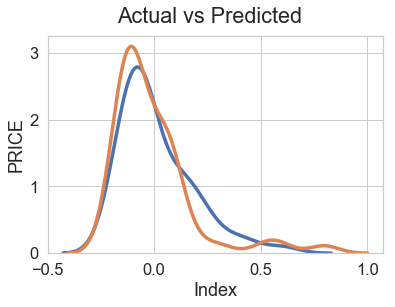

In [189]:
import seaborn as sns
sns.distplot(u_pred, hist=False);
sns.distplot(test_v,hist=False);
plt.suptitle('Actual vs Predicted')              # Plot heading 
plt.xlabel('Index')                               # X-label
plt.ylabel('PRICE')

Text(0, 0.5, 'PRICE')

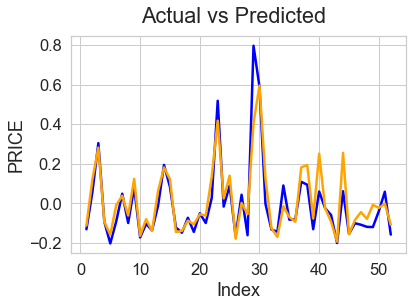

In [190]:
d=[j for j in range (1,53,1)]
fig = plt.figure()
plt.plot(d,test_v, color="blue",  linewidth=2.5, linestyle="-")
plt.plot(d,u_pred, color="orange",  linewidth=2.5, linestyle="-")
plt.xlabel('')
fig.suptitle('Actual vs Predicted')              # Plot heading 
plt.xlabel('Index')                               # X-label
plt.ylabel('PRICE')                               # Y-label


Text(0.5, 0.98, 'Error')

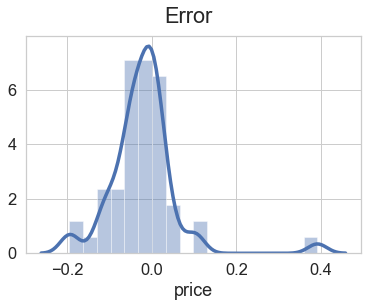

In [191]:
import seaborn as sns
sns.distplot(test_v-u_pred)
plt.suptitle('Error')

### fourth Model

In [192]:
model_04=car11[['enginelocation','price','curbweight','convertible','cylindernumber','rotor']]

In [193]:
e= model_04.loc[:,model_04.columns !='price']
f= model_04['price']

In [194]:
train_e,test_e,train_f,test_f=train_test_split(e,f,test_size=0.25)

In [195]:
from sklearn.linear_model import LinearRegression
model_04=LinearRegression()

In [196]:
model_04.fit(train_e,train_f)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [197]:
print('intercept:',model_04.intercept_)

intercept: 0.006949628190606698


In [198]:
e_pred =model_04.predict(test_e) 
#model prediction 

In [199]:
train_e_sm = train_e
train_e_sm = sm.add_constant(train_e_sm)
le= sm.OLS(train_f,train_e_sm).fit()
le.params

const             0.006950
enginelocation    0.362455
curbweight        0.626265
convertible       0.053149
cylindernumber    0.608181
rotor             0.176662
dtype: float64

In [200]:
vif04 = pd.DataFrame()
vif04["vif"] = [variance_inflation_factor(train_e_sm.values, a) for a in range(train_e_sm.shape[1])]
vif04["features"] =train_e_sm.columns # calculated vif on the rfe result features

In [201]:
vif04

,vif,features
0,1.047640,const
1,1.265258,enginelocation
2,1.544557,curbweight
3,1.200389,convertible
4,1.730882,cylindernumber
5,1.105661,rotor


In [202]:
print(le.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     169.0
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           4.37e-59
Time:                        00:06:45   Log-Likelihood:                 179.65
No. Observations:                 153   AIC:                            -347.3
Df Residuals:                     147   BIC:                            -329.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0069      0.006      1.

Text(0, 0.5, 'PRICE')

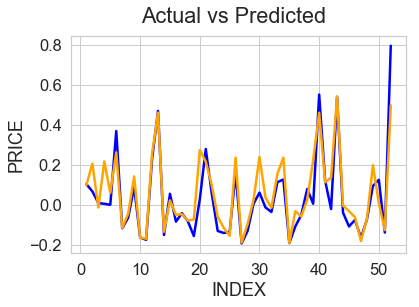

In [203]:
import seaborn as sns
d=[j for j in range (1,53,1)]
fig = plt.figure()
plt.plot(d,test_f, color="blue",  linewidth=2.5, linestyle="-")
plt.plot(d,e_pred, color="orange",  linewidth=2.5, linestyle="-")

plt.suptitle('Actual vs Predicted')
plt.xlabel('INDEX')                               # X-label
plt.ylabel('PRICE')                               # Y-label


In [204]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(test_f, e_pred))) #rmse shows how well fit the data 

RMSE : 0.09152346189845213


### Fifth Model

In [205]:
model_05=car11[['enginelocation','price','curbweight','cylindernumber','rotor']]

In [206]:
a1= model_05.loc[:,model_05.columns !='price']
b1= model_05['price']

In [207]:
train_a1,test_a1,train_b1,test_b1=train_test_split(a1,b1,test_size=0.25)

In [208]:
from sklearn.linear_model import LinearRegression
model_05=LinearRegression()

In [209]:
model_05.fit(train_a1,train_b1)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [210]:
print('intercept:',model_05.intercept_)

intercept: -9.024153566413937e-05


In [211]:
a1_pred =model_05.predict(test_a1) 
#model prediction 

In [212]:
train_a1_sm = train_a1
train_a1_sm = sm.add_constant(train_a1_sm)
la1= sm.OLS(train_b1,train_a1_sm).fit()
la1.params

const            -0.000090
enginelocation    0.390940
curbweight        0.629492
cylindernumber    0.577204
rotor             0.182827
dtype: float64

In [213]:
vif05 = pd.DataFrame()
vif05["vif"] = [variance_inflation_factor(train_a1_sm.values, a) for a in range(train_a1_sm.shape[1])]
vif05["features"] =train_a1_sm.columns # calculated vif on the rfe result features

In [214]:
vif05

,vif,features
0,1.002426,const
1,1.058133,enginelocation
2,1.602163,curbweight
3,1.848096,cylindernumber
4,1.150610,rotor


In [215]:
print(la1.summary()) # getting summary of the model 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     173.6
Date:                Thu, 16 Jan 2020   Prob (F-statistic):           7.90e-55
Time:                        00:06:47   Log-Likelihood:                 157.60
No. Observations:                 153   AIC:                            -305.2
Df Residuals:                     148   BIC:                            -290.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -9.024e-05      0.007     -0.

Text(0, 0.5, 'PRICE')

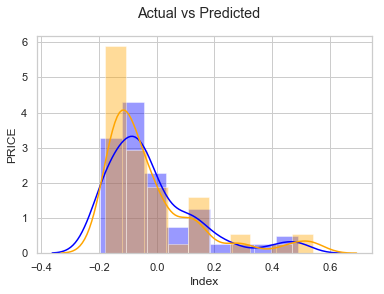

In [233]:
import seaborn as sns
sns.distplot(a1_pred, hist=True,color='blue');
sns.distplot(test_b1,hist=True,color='orange');
plt.suptitle('Actual vs Predicted')              # Plot heading 
plt.xlabel('Index')                               # X-label
plt.ylabel('PRICE')

Text(0, 0.5, 'PRICE')

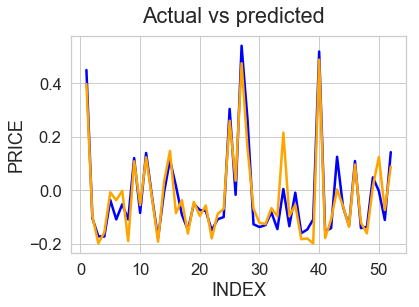

In [216]:

d=[j for j in range (1,53,1)]
fig = plt.figure()
plt.plot(d,test_b1, label ="actual",color="blue",  linewidth=2.5, linestyle="-")
plt.plot(d,a1_pred,label="pred", color="orange",  linewidth=2.5, linestyle="-")
plt.suptitle('Actual vs predicted')
plt.xlabel('INDEX')                               # X-label
plt.ylabel('PRICE')                               # Y-label


F:\anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0.98, 'Error')

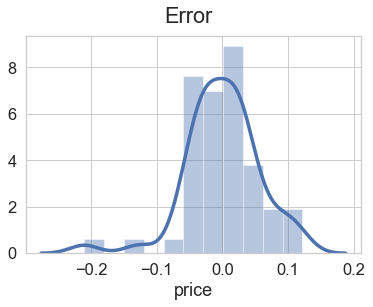

In [217]:
import seaborn as sns
sns.distplot(test_b1-a1_pred)
plt.suptitle('Error')

Residual Plots

As you evaluate models, check the residual plots because they can help you avoid inadequate models and help you adjust your model for better results. 

Text(0.5, 0.98, 'Residuals for model')

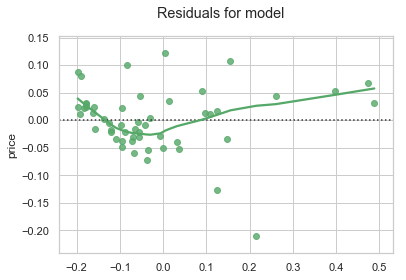

In [218]:
import numpy as np
import seaborn as sns
sns.set(style="whitegrid")
sns.residplot(a1_pred, test_b1,lowess=True, color="g")
plt.suptitle('Residuals for model')

In [219]:
a1_pred =model_05.predict(test_a1) #model prediction 

In [220]:
mse_5 = mean_squared_error(test_b1, a1_pred)
r_sq_5 = r2_score(test_b1, a1_pred)

In [221]:
mse_u

0.051753567298997175

In [222]:
r_sq_u

-0.3889857825843712

In [223]:
from sklearn import metrics
print('RMSE :', np.sqrt(metrics.mean_squared_error(test_b1, a1_pred))) #rmse shows how well fit the data 

RMSE : 0.05613924526530146
